# **3. Pré-processamento**

O objetivo desse notebook é:

- Tratar nulos.
- Tratar Outliers.
- Fazer novas codificações.
- Fazer fusão de atributos.

No geral, o objetivo desse notebook é deixar a base totalmente preparada para o uso dos algoritmos de Machine Learning.

In [320]:
#Importando bibliotecas.
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt

In [321]:
# Aplicar o estilo do Seaborn
sns.set(style="whitegrid")

In [322]:
df = pd.read_csv("C://Users//Gustavo//OneDrive//Documentos//PUC//3° Periodo//Mineraçao de Dados//trabalho//dados//df_selecionado.csv")

In [323]:
df.shape

(135658, 27)

## Legibilidade: Renomeação de Colunas.

In [324]:
df.rename(columns={'P00104': 'Peso'}, inplace=True)
df.rename(columns={'P00404': 'Altura'}, inplace=True)
df.rename(columns={'C006': 'Sexo'}, inplace=True)
df.rename(columns={'C008': 'Idade'}, inplace=True)
df.rename(columns={'C009': 'Raca_etnia'}, inplace=True)
df.rename(columns={'VDF004': 'Faixa_salarial'}, inplace=True)
df.rename(columns={'VDD004A': 'Escolaridade'}, inplace=True)
df.rename(columns={'D001': 'Alfabetizacao'}, inplace=True)
df.rename(columns={'P027': 'Frequencia_alcoolismo'}, inplace=True)
df.rename(columns={'P02801': 'Qtd_alcool_semanal'}, inplace=True)
df.rename(columns={'P029': 'Qtd_doses_alcoolicas'}, inplace=True)
df.rename(columns={'P02601': 'Consumo_sal'}, inplace=True)
df.rename(columns={'P034': 'Atividades_fisicas'}, inplace=True)
df.rename(columns={'H001': 'Ultima_consulta'}, inplace=True)
df.rename(columns={'J037': 'Ficou_internado'}, inplace=True) 
df.rename(columns={'I00102': 'Tem_plano'}, inplace=True)
df.rename(columns={'N001': 'Percepcao_estado_saude'}, inplace=True)

In [325]:
df_saudaveis = df.loc[df["Condicao"] == "Saudavel"]

# Base de dados de pessoas que possuem hipertensão.
df_hipertensos = df.loc[df["Condicao"] == "Hipertenso"]

# Base de dados de pessoas que possuem hipertensão e doenças cardiovasculares.
df_hiper_cvd = df.loc[df["Condicao"] == "HiperCVD"]

In [326]:
len(df_saudaveis)

#len(df_hipertensos)

#len(df_hiper_cvd)

112551

## **3.1. Aspecto - Características do Individuo 👨‍👩‍👧‍👦**

### 3.1.1. Nulos

In [327]:
colunas_especificas = [
             "Peso",
             "Altura",
]

df[colunas_especificas].isnull().sum()

Peso      80468
Altura    80468
dtype: int64

No aspecto de características do indivíduo, há 80.468 pessoas que não informaram peso e altura.

In [328]:
df = df.dropna(subset=['Peso', 'Altura'])

In [329]:
len(df['Condicao']=='Saudavel')

55190

Mesmo descartando por volta de 20 mil instâncias nulas das pessoas saudáveis, ainda restam 55.190 saudáveis que responderam as perguntas em relação à peso e altura. Já as pessoas das outras classes, todas responderam sua altura e seu peso.

Todos nulos foram tratados.

### 3.1.2. Outliers

**Altura**

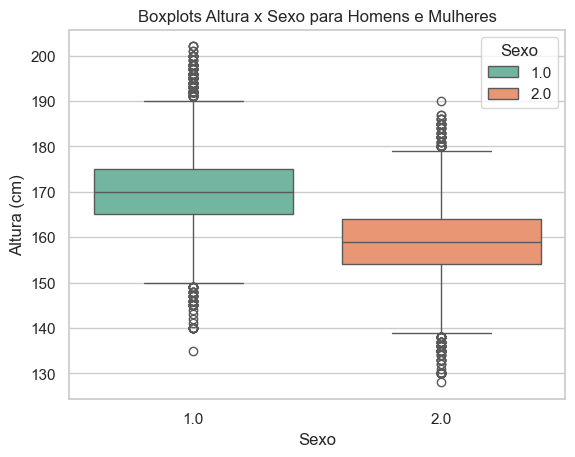

In [330]:
# Boxplot de alturas.

sns.boxplot(x = "Sexo", y = "Altura", data=df, palette="Set2", hue="Sexo")

plt.title("Boxplots Altura x Sexo para Homens e Mulheres")
plt.xlabel("Sexo")
plt.ylabel("Altura (cm)")
plt.show()

Segundo o Ministério da Saúde do Brasil, o **nanismo** configura-se como alturas de pessoas que não ultrapassam de 1.45m para homens e 1.40m para mulheres, mas isso não é uma certeza e sim apenas um indício. Nesse caso, para o IQR essas pessoas estão sendo consideradas como Outliers, assim como pessoas acima de 1.9m para homens e 1.78m, aproximadamente, para mulheres.

In [331]:
print(f"Pessoas Saudáveis com até 1.45m: {df_saudaveis["Altura"].loc[df_saudaveis["Altura"] <= 145].count()}")
print(f"Pessoas Hipertensas com até 1.45m: {df_hipertensos["Altura"].loc[df_hipertensos["Altura"] <= 145].count()}")
print(f"Pessoas HiperCVD com até 1.45m: {df_hiper_cvd["Altura"].loc[df_hiper_cvd["Altura"] <= 145].count()}")

Pessoas Saudáveis com até 1.45m: 458
Pessoas Hipertensas com até 1.45m: 596
Pessoas HiperCVD com até 1.45m: 84


**Peso**

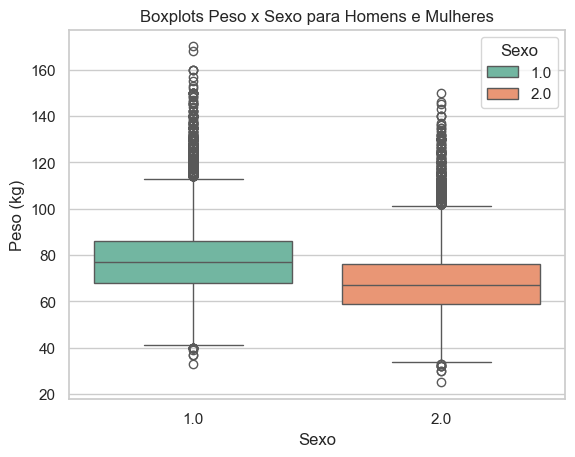

In [332]:
# Boxplot de pesos.

sns.boxplot(x = "Sexo", y = "Peso", data=df, palette="Set2", hue="Sexo")

plt.title("Boxplots Peso x Sexo para Homens e Mulheres")
plt.xlabel("Sexo")
plt.ylabel("Peso (kg)")
plt.show()

O boxplot acusa muitos outliers tanto para homens quanto para mulheres em relação ao peso, entretanto, oque me causa preocupação são os outliers abaixo do limite inferior do IQR, isso porque há pesos entre 20 e 40 kg para pessoas com no mínimo 30 anos de idade. Há três ocorrências.

Já os outliers acima do intervalor IQR são pláusiveis em suas quantidades, porque na população global há uma presença cada vez maior de obesidade para ambos os sexos. Pessoas entre 100kg - 170kg estão cada vez mais comuns a sua ocorrência.

In [333]:
def calculo_iqr(lista):
    
    lista = lista.sort_values()

    q1= np.percentile(lista, 25)
    q3 = np.percentile(lista, 75)

    iqr = q3 - q1

    return q1, q3, iqr

In [334]:
def calculo_outliers(lista):
    q1, q3, iqr = calculo_iqr(lista)

    #Limite inferior e superior IQR
    lim_inferior = q1 - (1.5*iqr)
    lim_superior = q3 + (1.5*iqr)
    print(f"Limites:[{lim_inferior} - {lim_superior}]")

    outliers_min = [elemento for elemento in lista if elemento < lim_inferior]
    outliers_max = [elemento for elemento in lista if elemento > lim_superior]

    outliers = outliers_min + outliers_max
    return outliers

In [335]:
outliers_peso = calculo_outliers(df["Peso"])

Limites:[32.0 - 112.0]


Os outliers para o peso estão:

- Abaixo de 32kg
- Acima de 112kg

Pesos acima de 112kg são comuns e configuram **obesidade**, que é fator de risco para as comorbidades aqui estudadas. Entretanto, pessoas que pesam menos de 32kg com 30 anos de idade configuram-se como outliers já que são muito atípicos.

In [336]:
print(f"Quantidade de Outliers (VARIÁVEL PESO): {len(outliers_peso)}")

Quantidade de Outliers (VARIÁVEL PESO): 806


Há 357 pessoas consideradas como Outliers pelo IQR.

In [337]:
df.loc[(df["Peso"] < 45) & (df["Altura"] <= 200)]

,Peso,Altura,Sexo,Idade,Raca_etnia,Consumo_sal,Atividades_fisicas,P050,P052,P05401,...,Qtd_alcool_semanal,Qtd_doses_alcoolicas,Ficou_internado,Ultima_consulta,Percepcao_estado_saude,Tem_plano,Alfabetizacao,Escolaridade,Faixa_salarial,Condicao
177,43.0,165.0,2.0,61.0,2.0,4.0,2.0,1.0,NaN,1.0,...,NaN,NaN,2.0,3.0,2.0,1.0,1.0,2.0,3.0,Saudavel
484,39.0,140.0,2.0,37.0,4.0,2.0,2.0,3.0,3.0,NaN,...,NaN,NaN,2.0,1.0,4.0,2.0,1.0,2.0,2.0,Saudavel
665,41.0,140.0,2.0,90.0,1.0,3.0,2.0,3.0,1.0,NaN,...,NaN,NaN,2.0,2.0,3.0,2.0,2.0,1.0,4.0,Saudavel
731,41.0,160.0,2.0,30.0,4.0,3.0,1.0,3.0,3.0,NaN,...,NaN,NaN,2.0,2.0,2.0,2.0,1.0,6.0,4.0,Saudavel
743,41.0,160.0,2.0,51.0,4.0,4.0,1.0,3.0,3.0,NaN,...,NaN,NaN,2.0,4.0,2.0,2.0,1.0,3.0,3.0,Saudavel
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135521,42.0,163.0,2.0,61.0,4.0,3.0,2.0,1.0,NaN,1.0,...,NaN,NaN,1.0,4.0,5.0,2.0,2.0,1.0,3.0,HiperCVD
135586,35.0,152.0,2.0,85.0,1.0,4.0,2.0,3.0,1.0,NaN,...,NaN,NaN,1.0,3.0,3.0,1.0,2.0,2.0,3.0,HiperCVD
135593,37.0,160.0,1.0,71.0,4.0,3.0,2.0,1.0,NaN,1.0,...,NaN,NaN,1.0,3.0,3.0,2.0,1.0,1.0,4.0,HiperCVD
135637,40.0,144.0,2.0,41.0,4.0,4.0,2.0,3.0,1.0,NaN,...,NaN,NaN,2.0,1.0,3.0,2.0,1.0,2.0,4.0,HiperCVD


Há 478 pessoas que pesam menos de 45 kg, esse peso para pessoas de pelo menos 30 anos é bem fora do padrão, até mesmo para pessoas de 90 anos.

**Conclusão:** Vou excluir esses 478 registros. São valores extremamente incomuns para pessoas com essas condições de idade.

In [338]:
indices_exclusao = df.loc[(df["Peso"] < 45) & (df["Altura"] <= 200)].index

In [339]:
#Remoção dessas instâncias do conjunto de dados.
df.drop(indices_exclusao, inplace=True)

In [340]:
df.shape

(54712, 27)

In [341]:
df["Peso"].describe()

count    54712.000000
mean        73.497734
std         14.879452
min         45.000000
25%         63.000000
50%         72.000000
75%         82.000000
max        170.000000
Name: Peso, dtype: float64

### **3.1.3 Codificação: IMC e Categoria IMC**

Para doenças cardiovasculares e hipertensão, o IMC é uma variável que indica se uma pessoa pode desenvolver essas comorbidades, isso porque ela informa se uma pessoa está em estado de desnutrição, saudável, obesa, muito obesa.

Logo, vamos criar uma nova coluna que represente o IMC das pessoas.

In [342]:
df["IMC"] = df["Peso"] / (df["Altura"]/100)**2

In [343]:
bins = [-float('inf'), 18.5, 24.9, 29.9, float('inf')]
labels = ['Baixo Peso', 'Peso Ideal', 'Sobrepeso', 'Obeso']


#Categorizando as pessoas de acordo com o valor de IMC.
df["Categoria_IMC"] = pd.cut(df["IMC"], bins=bins, labels=labels)

In [344]:
df["Categoria_IMC"].value_counts()

Categoria_IMC
Sobrepeso     22131
Peso Ideal    19127
Obeso         12903
Baixo Peso      551
Name: count, dtype: int64

A grande maioria das pessoas estão classificadas com sobrepeso e obesidade. Isso é aceitável, visto que atualmente as pessoas alimentam-se de ultraprocessados, fast-foods, produtos químicos, etc.

## **3.2. Aspecto - Antropometria 🧍‍♂️**

### 3.2.1 Nulos

In [345]:
colunas_especificas = [
             "Idade",
             "Sexo",
             "Raca_etnia",
]

df[colunas_especificas].isnull().sum()

Idade         0
Sexo          0
Raca_etnia    0
dtype: int64

Não há nulos no aspecto antropométrico

### 3.2.2. Codificação: Categorização das Raças: Pretos e Não Pretos

In [346]:
df["Raca_etnia"].value_counts()

Raca_etnia
4.0    27478
1.0    19870
2.0     6519
3.0      424
5.0      413
9.0        8
Name: count, dtype: int64

As raças estão dispostas da seguinte forma:

- Pardos (4.0):  27.478 pessoas.

- Brancos (1.0): 19.870 pessoas.

- Pretos (2.0):  6.519 pessoas.

- Amarelos (3.0): 424 pessoas.

- Indigenas (5.0): 413 pessoas.

- Ignorado (9.0):  8 pessoas.

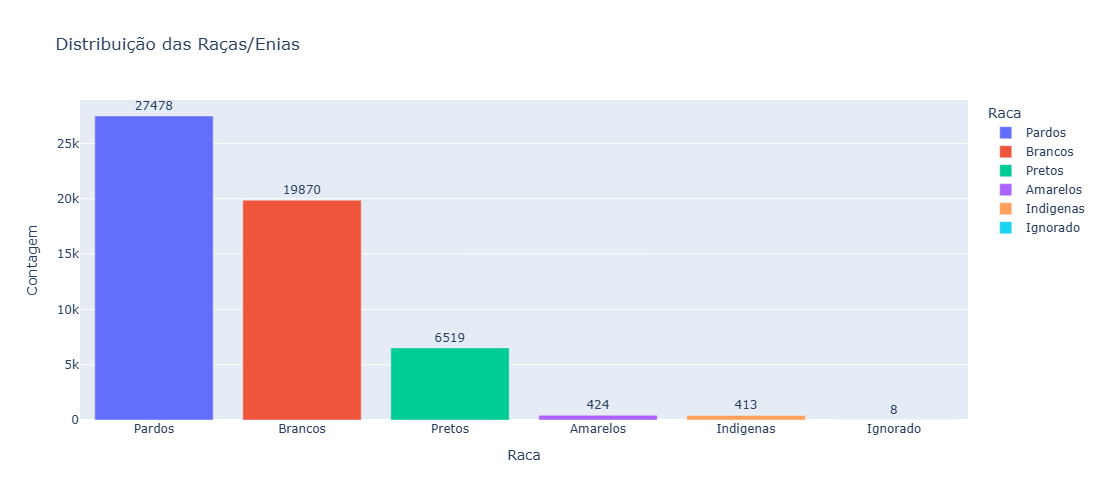

In [347]:
#Dicionario para mapeamento.
dicionario = {
    1: 'Brancos',
    2: 'Pretos',
    3: 'Amarelos',
    4: 'Pardos',
    5: 'Indigenas',
    9: 'Ignorado',
}

contagem = df["Raca_etnia"].value_counts().reset_index()
contagem.columns = ['Raca', 'Contagem']

#mapeamento das instruções na própria coluna Instrução.
contagem['Raca'] = contagem['Raca'].map(dicionario)
contagem = contagem.sort_values(by='Contagem', ascending=False)

# Supondo que a coluna de nível de instrução seja 'NivelInstrucao'
fig = px.bar(
    contagem,
    x='Raca',
    y='Contagem',
    labels={'count': 'Contagem', 'Raca_etnia': 'Raça/Etnia'},
    title='Distribuição das Raças/Enias',
    color='Raca',
    text='Contagem'
)

fig.update_traces(textposition='outside')

fig.update_layout(
    width=1000,
    height=500,
)

fig.show()

**A maioria das pessoas são pardas**, isso corresponde à 50,22% do conjunto total de dados. Em seguida os brancos ocupam 36,31% do conjunto de dados.

**Conclusão:** De acordo com as literaturas estudadas, pessoas pardas e pretas possuem uma **tendência genética maior a desenvolverem hipertensão e problemas cardiovasculares**, por isso irei aplicar a categorização das raças em 2 conjuntos: pretos e não pretos.

In [348]:
df["Raca_etnia"].value_counts()

Raca_etnia
4.0    27478
1.0    19870
2.0     6519
3.0      424
5.0      413
9.0        8
Name: count, dtype: int64

In [349]:
# Atualizar a coluna C009: 0 para pessoas não pretas e 1 para pessoas pretas.
df["Raca_etnia"] = np.where(df["Raca_etnia"].isin([1, 3, 5, 9]), 0, 1)

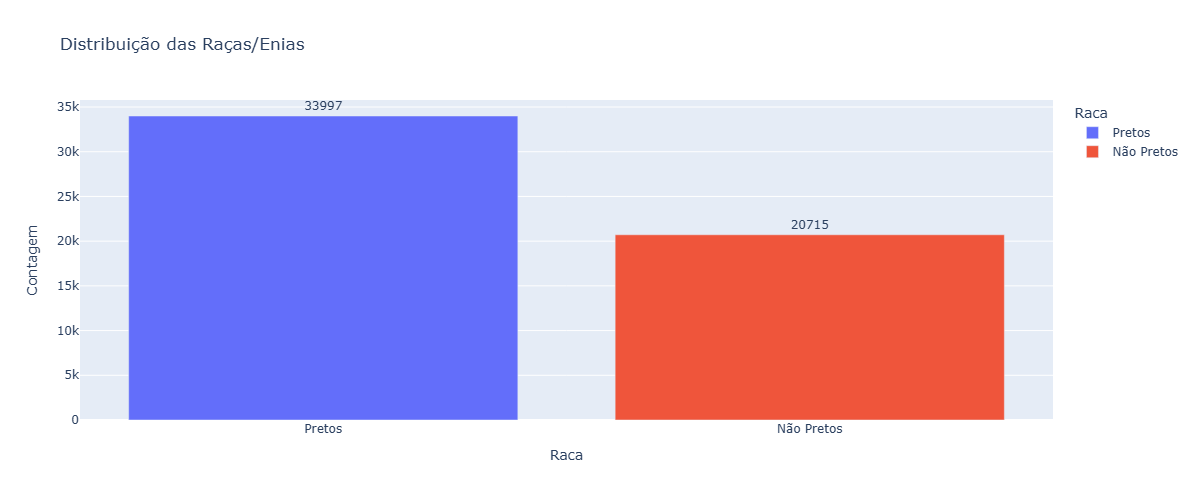

In [350]:
#Dicionario para mapeamento.
dicionario = {
    1: 'Pretos',
    0: 'Não Pretos',
}

contagem = df["Raca_etnia"].value_counts().reset_index()
contagem.columns = ['Raca', 'Contagem']

#mapeamento das instruções na própria coluna Instrução.
contagem['Raca'] = contagem['Raca'].map(dicionario)
contagem = contagem.sort_values(by='Contagem', ascending=False)

# Supondo que a coluna de nível de instrução seja 'NivelInstrucao'
fig = px.bar(
    contagem,
    x='Raca',
    y='Contagem',
    labels={'count': 'Contagem', 'Raca_etnia': 'Raça/Etnia'},
    title='Distribuição das Raças/Enias',
    color='Raca',
    text='Contagem'
)

fig.update_traces(textposition='outside')

fig.update_layout(
    width=1000,
    height=500,
)

fig.show()

Dessa forma, temos as pessoas categorizadas em dois conjuntos predominantes de acordo com a predisposição genética a desenvolver as comorbidades.

## **3.3. Aspecto -Hábitos Alimentares 🍕**

### 3.3.1. Tratando Nulos

In [351]:
colunas_especificas = [
             "Consumo_sal",
]

df[colunas_especificas].isnull().sum()

Consumo_sal    0
dtype: int64

Não há nulos para o consumo de Sal.

## **3.4. Aspecto - Atividades Físicas 🏋️‍♂️**

### 3.4.1. Tratando Nulos

In [352]:
colunas_especificas = [
     "Atividades_fisicas",
]

df[colunas_especificas].isnull().sum()

Atividades_fisicas    0
dtype: int64

Não há nulos nos atributos selecionados.

In [353]:
df["Atividades_fisicas"].value_counts()

Atividades_fisicas
2.0    34783
1.0    19929
Name: count, dtype: int64

De aproximadamente 55 mil pessoas, a maioria não praticou **nenhum esporte físico nos últimos 3 meses!** Isso significa que a maioria das pessoas não se exercitam nem mesmo com alguma frequência.

## **3.5. Aspecto - Tabagismo 🚬**

### 3.5.1. Tratando Nulos

In [354]:
colunas_especificas = [
    "P050",
     "P052",
     "P05401",
     "P05404",
     "P05407",
     "P05410",
     "P05413",
     "P05416",
     "P05419",
]

df[colunas_especificas].isnull().sum()

P050          0
P052       7119
P05401    47593
P05404    47593
P05407    47593
P05410    47593
P05413    47593
P05416    47593
P05419    47593
dtype: int64

Há muitos nulos nos produtos de tabaco, mas é necessário analisar se a pessoa fuma um produto X mas não fuma um produto Y.

In [355]:
df.loc[(df["P050"] == 3) & (df["P05401"].isna())]

,Peso,Altura,Sexo,Idade,Raca_etnia,Consumo_sal,Atividades_fisicas,P050,P052,P05401,...,Ficou_internado,Ultima_consulta,Percepcao_estado_saude,Tem_plano,Alfabetizacao,Escolaridade,Faixa_salarial,Condicao,IMC,Categoria_IMC
3,77.0,155.0,2.0,45.0,1,4.0,2.0,3.0,1.0,NaN,...,2.0,4.0,3.0,2.0,1.0,5.0,3.0,Saudavel,32.049948,Obeso
5,56.0,159.0,2.0,58.0,1,3.0,1.0,3.0,3.0,NaN,...,2.0,4.0,3.0,2.0,2.0,1.0,2.0,Saudavel,22.151023,Peso Ideal
6,75.0,170.0,2.0,41.0,1,3.0,1.0,3.0,3.0,NaN,...,2.0,2.0,2.0,2.0,1.0,5.0,4.0,Saudavel,25.951557,Sobrepeso
10,80.0,172.0,1.0,33.0,1,3.0,1.0,3.0,2.0,NaN,...,2.0,1.0,2.0,1.0,1.0,4.0,3.0,Saudavel,27.041644,Sobrepeso
11,80.0,172.0,1.0,36.0,0,4.0,1.0,3.0,3.0,NaN,...,2.0,4.0,2.0,2.0,1.0,5.0,4.0,Saudavel,27.041644,Sobrepeso
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135652,65.0,149.0,2.0,52.0,0,3.0,2.0,3.0,3.0,NaN,...,1.0,2.0,3.0,2.0,1.0,5.0,3.0,HiperCVD,29.277960,Sobrepeso
135653,79.0,155.0,2.0,45.0,0,4.0,2.0,3.0,3.0,NaN,...,1.0,3.0,3.0,2.0,1.0,1.0,3.0,HiperCVD,32.882414,Obeso
135654,84.0,178.0,1.0,68.0,0,3.0,2.0,3.0,1.0,NaN,...,1.0,3.0,4.0,1.0,2.0,1.0,3.0,HiperCVD,26.511804,Sobrepeso
135655,74.0,172.0,1.0,73.0,1,4.0,2.0,3.0,1.0,NaN,...,1.0,3.0,3.0,2.0,2.0,1.0,4.0,HiperCVD,25.013521,Sobrepeso


Olha que **interessante!** As pessoas que não responderam sobre o consumo e a frequência dos produtos do tabaco é porque **elas não fumam!** Logo, vamos substituir todos esses nulos por 0.

**Conclusão:** Substituição dos nulos por 0, que significa que a pessoa não usa esse tipo de produto.

In [356]:
# Lista das colunas a serem 'consertados' os valores nulos
colunas_a_substituir = ["P05401", "P05404", "P05407", "P05410", "P05413", "P05416", "P05419"]

# Substituindo por 0, coluna por coluna
for coluna in colunas_a_substituir:
    df.loc[(df["P050"] == 3) & (df[coluna].isna()), coluna] = 0


In [357]:
colunas_especificas = [
    "P050",
     "P052",
     "P05401",
     "P05404",
     "P05407",
     "P05410",
     "P05413",
     "P05416",
     "P05419",
]

df[colunas_especificas].isnull().sum()

P050         0
P052      7119
P05401       0
P05404       0
P05407       0
P05410       0
P05413       0
P05416       0
P05419       0
dtype: int64

In [358]:
df.loc[(df["P050"] == 1) & (df["P052"].isna())]

,Peso,Altura,Sexo,Idade,Raca_etnia,Consumo_sal,Atividades_fisicas,P050,P052,P05401,...,Ficou_internado,Ultima_consulta,Percepcao_estado_saude,Tem_plano,Alfabetizacao,Escolaridade,Faixa_salarial,Condicao,IMC,Categoria_IMC
41,68.0,176.0,1.0,59.0,1,3.0,2.0,1.0,NaN,1.0,...,1.0,3.0,2.0,2.0,1.0,5.0,4.0,Saudavel,21.952479,Peso Ideal
53,66.0,165.0,1.0,48.0,1,1.0,2.0,1.0,NaN,1.0,...,2.0,3.0,3.0,2.0,2.0,2.0,3.0,Saudavel,24.242424,Peso Ideal
90,86.0,178.0,1.0,38.0,0,4.0,1.0,1.0,NaN,1.0,...,2.0,4.0,2.0,1.0,1.0,2.0,5.0,Saudavel,27.143037,Sobrepeso
92,72.0,172.0,1.0,51.0,1,4.0,2.0,1.0,NaN,1.0,...,2.0,4.0,2.0,2.0,1.0,2.0,4.0,Saudavel,24.337480,Peso Ideal
105,75.0,174.0,1.0,32.0,0,3.0,2.0,1.0,NaN,1.0,...,2.0,4.0,2.0,2.0,1.0,4.0,1.0,Saudavel,24.772097,Peso Ideal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135607,98.0,178.0,1.0,54.0,0,3.0,2.0,1.0,NaN,5.0,...,2.0,3.0,2.0,1.0,1.0,7.0,7.0,HiperCVD,30.930438,Obeso
135618,112.0,185.0,1.0,52.0,0,4.0,1.0,1.0,NaN,5.0,...,2.0,3.0,4.0,1.0,1.0,7.0,4.0,HiperCVD,32.724617,Obeso
135619,70.0,166.0,1.0,53.0,0,2.0,2.0,1.0,NaN,1.0,...,2.0,3.0,2.0,1.0,1.0,5.0,7.0,HiperCVD,25.402816,Sobrepeso
135648,78.0,178.0,1.0,75.0,0,3.0,2.0,1.0,NaN,1.0,...,1.0,1.0,2.0,2.0,2.0,2.0,4.0,HiperCVD,24.618104,Peso Ideal


Muitas pessoas que fumam atualmente, não foi aplicadas à elas a pergunta de fumar no passado. De 7.119 nulos, 6.514 são fumantes diários.

**Conclusão:** para essas pessoas, vamos substituir os nulos por 1 que significa que no passado fumaram diariamente.

In [359]:
df.loc[(df["P050"] == 2) & (df["P052"].isna())]

,Peso,Altura,Sexo,Idade,Raca_etnia,Consumo_sal,Atividades_fisicas,P050,P052,P05401,...,Ficou_internado,Ultima_consulta,Percepcao_estado_saude,Tem_plano,Alfabetizacao,Escolaridade,Faixa_salarial,Condicao,IMC,Categoria_IMC
9,60.0,156.0,2.0,38.0,0,4.0,2.0,2.0,NaN,2.0,...,2.0,4.0,2.0,2.0,1.0,5.0,1.0,Saudavel,24.654832,Peso Ideal
122,76.0,171.0,1.0,32.0,0,3.0,1.0,2.0,NaN,2.0,...,2.0,1.0,2.0,2.0,1.0,2.0,2.0,Saudavel,25.990903,Sobrepeso
179,80.0,168.0,1.0,47.0,1,3.0,2.0,2.0,NaN,3.0,...,2.0,4.0,2.0,2.0,1.0,7.0,4.0,Saudavel,28.344671,Sobrepeso
360,68.0,177.0,1.0,36.0,1,3.0,1.0,2.0,NaN,4.0,...,2.0,1.0,1.0,1.0,1.0,7.0,7.0,Saudavel,21.705129,Peso Ideal
525,56.0,170.0,1.0,47.0,0,3.0,2.0,2.0,NaN,3.0,...,2.0,4.0,4.0,2.0,2.0,2.0,3.0,Saudavel,19.377163,Peso Ideal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134908,87.0,168.0,2.0,46.0,0,3.0,2.0,2.0,NaN,2.0,...,1.0,3.0,3.0,2.0,1.0,5.0,1.0,HiperCVD,30.824830,Obeso
134943,65.0,154.0,1.0,47.0,0,3.0,2.0,2.0,NaN,5.0,...,1.0,3.0,3.0,2.0,1.0,2.0,1.0,HiperCVD,27.407657,Sobrepeso
135192,52.0,155.0,2.0,61.0,0,3.0,1.0,2.0,NaN,2.0,...,2.0,1.0,2.0,1.0,1.0,7.0,5.0,HiperCVD,21.644121,Peso Ideal
135481,112.0,152.0,2.0,53.0,0,4.0,1.0,2.0,NaN,2.0,...,1.0,1.0,3.0,2.0,1.0,5.0,4.0,HiperCVD,48.476454,Obeso


A mesma coisa ocorre para pessoas que responderam que fumam menos que diariamente. Não foi aplicada a pergunta de tabagismo delas no passado, vamos substituir esses valores nulos por 2.

**Conclusão:** para as pessoas que fumam menos que diariamente atualmente, receberão 2 para o tabagismo no passado.

In [360]:
# Substituição dos nulos das pessoas que fumam diariamente mas que não tiveram a pergunta do passado aplicada.
df.loc[(df["P050"] == 1) & (df["P052"].isna()), "P052"] = 1

# Substituição dos nulos das pessoas que fumam menos que diariamente mas que não tiveram a pergunta do passado aplicada.
df.loc[(df["P050"] == 2) & (df["P052"].isna()), "P052"] = 2

In [361]:
colunas_especificas = [
    "P050",
     "P052",
     "P05401",
     "P05404",
     "P05407",
     "P05410",
     "P05413",
     "P05416",
     "P05419",
]

df[colunas_especificas].isnull().sum()

P050      0
P052      0
P05401    0
P05404    0
P05407    0
P05410    0
P05413    0
P05416    0
P05419    0
dtype: int64

Todos os nulos foram devidamente tratados. Agora, vamos criar classificações de hábito de tabagismo para as pessoas, de maneira que vamos fundir atributos do tabaco. Assim, será feita a **redução de dimensionalidade**

### 3.5.2. Codificação: Categorizando os fumantes e não fumantes

O objetivo dessa etapa é dizer o seguinte:

- Fuma muito
- Fuma razoavelmente
- Fuma pouco
- Não fuma

In [362]:
def categorizar_fumantes(linha):

    if linha["P050"] == 3 and linha["P052"] == 1: # Se não fuma atualmente, mas fumou diariamente no passado -> FUMA RAZOAVEL
        return 2
    elif linha["P050"] == 3 and linha["P052"] == 2: # Se não fuma atualmente mas fumou menos que diariamente no passado -> FUMA POUCO.
        return 3
    elif linha["P050"] == 1: # Se fuma diariamente atualmente -> FUMA MUITO.
        return 1
    elif linha["P050"] == 2: # Se fuma menos que diariamente atualmente -> DEPENDE
        if linha["P05401"] == 1 or linha["P05404"] == 1 or linha["P05410"] == 1 or linha["P05413"] == 1 or linha["P05416"] == 1 or linha["P05419"] == 1:
            return 1 # fuma muito.
        elif linha["P05401"] == 2 or linha["P05404"] == 2 or linha["P05410"] == 2 or linha["P05413"] == 2 or linha["P05416"] == 2 or linha["P05419"] == 2:
            return 2 #fuma razoavelmente.
        elif linha["P05401"] == 3 or linha["P05404"] == 3 or linha["P05410"] == 3 or linha["P05413"] == 3 or linha["P05416"] == 3 or linha["P05419"] == 3:
            return 3 # fuma pouco.
        elif linha["P05401"] == 4 or linha["P05404"] == 4 or linha["P05410"] == 4 or linha["P05413"] == 4 or linha["P05416"] == 4 or linha["P05419"] == 4:
            return 3 # fuma pouco.
         
    elif linha["P050"] == 3 and linha["P052"] == 3: # Se não fuma atualmente e não fumou no passado -> NÃO FUMA. 
        return 4
    else: # Se houver ignorados, serão considerados como não fumantes
        return 4
    

In [363]:
# Aplicando a função a cada linha do DataFrame
df["Categoria_tabagismo"] = df.apply(categorizar_fumantes, axis=1)

In [364]:
df["Categoria_tabagismo"].value_counts()

Categoria_tabagismo
4.0    32010
2.0    14171
1.0     6514
3.0     2016
Name: count, dtype: int64

In [365]:
#Dicionario para mapeamento.
dicionario = {
    1: 'Fuma Muito',
    2: 'Fuma Razoavelmente',
    3: 'Fuma Pouco',
    4: 'Não Fuma'
}

contagem = df["Categoria_tabagismo"].value_counts().reset_index()
contagem.columns = ['Categoria_tabagismo', 'Contagem']

#mapeamento das instruções na própria coluna Instrução.
contagem['Categoria_tabagismo'] = contagem['Categoria_tabagismo'].map(dicionario)
contagem = contagem.sort_values(by='Contagem', ascending=False)

# Supondo que a coluna de nível de instrução seja 'NivelInstrucao'
fig = px.bar(
    contagem,
    x='Categoria_tabagismo',
    y='Contagem',
    labels={'count': 'Contagem', 'Categoria_tabagismo': 'Categoria de Tabagismo'},
    title='Distribuição das Categorias de Tabagismo',
    color='Categoria_tabagismo',
    text='Contagem',
    color_discrete_sequence=["#FF6347", "#4682B4", "#32CD32", "#FFD700"]
)

fig.update_traces(textposition='outside')

fig.update_layout(
    width=1000,
    height=500,
)

fig.show()

A maioria das pessoas da base de dados não fumam. Já as que fumam, independentemente da frequência de fumo, **totalizam 22.701 pessoas**. Se pensarmos que temos 55 mil pessoas aproximadamente, cerca de 41,49% delas configuram-se como fumantes.

In [366]:
# Com a coluna 'Categoria_tabagismo' criada, as outras já não são mais interessantes para o modelo, vamos jogá-las fora.
df.drop(["P050", "P052", "P05401", "P05404", "P05407", "P05410", "P05413", "P05416", "P05419"], axis=1, inplace=True)

In [367]:
df.shape

(54712, 21)

## **3.6. Aspecto Alcoolismo 🍺**

### 3.6.1. Tratando Nulos

In [368]:
colunas_especificas = [
             "Frequencia_alcoolismo",
             "Qtd_alcool_semanal",
             "Qtd_doses_alcoolicas",
]

df[colunas_especificas].isnull().sum()

Frequencia_alcoolismo        0
Qtd_alcool_semanal       40173
Qtd_doses_alcoolicas     33702
dtype: int64

In [369]:
len(df.loc[(df["Frequencia_alcoolismo"] == 1) & (df["Qtd_alcool_semanal"].isna())])

33702

Quantidade de pessoas que não responderam sobre a **frequência semanal, pelo fato de não beberem bebidas álcoolicas**.

In [370]:
len(df.loc[(df["Frequencia_alcoolismo"] == 1) & (df["Qtd_doses_alcoolicas"].isna())])

33702

Quantidade de pessoas que não responderam sobre a **quantidade de doses, pelo fato de não beberem bebidas álcoolicas**.

In [371]:
# Lista das colunas a serem 'consertados' os valores nulos
colunas_a_substituir = ["Qtd_alcool_semanal", "Qtd_doses_alcoolicas"]

# Substituindo por 0, coluna por coluna
for coluna in colunas_a_substituir:
    df.loc[(df["Frequencia_alcoolismo"] == 1) & (df[coluna].isna()), coluna] = 0

**Conclusão:** Nulos em relação a frequência semanal e diária substuidos por 0, isso significa que quem respondeu 0 é porque simplesmente não bebe.

In [372]:
colunas_especificas = [
             "Frequencia_alcoolismo",
             "Qtd_alcool_semanal",
             "Qtd_doses_alcoolicas",
]

df[colunas_especificas].isnull().sum()

Frequencia_alcoolismo       0
Qtd_alcool_semanal       6471
Qtd_doses_alcoolicas        0
dtype: int64

Ainda assim, há 6.471 valores nulos em relação à frequência semanal de consumo de bebidas álcoolicas. Essas pessoas que não responderam, são pessoas que bebem. Isso porque as que não bebem já foram **tratadas anteriormente**.

In [373]:
df.loc[df["Qtd_alcool_semanal"].isnull(), "Condicao"].value_counts()

Condicao
Saudavel      4254
Hipertenso    1946
HiperCVD       271
Name: count, dtype: int64

Desses 6.471 valores nulos, são:
- 4.254 pessoas saudáveis
- 1.946 pessoas hipertensas
- 271 pessoas com doenças cardiovasculares e hipertensas

In [374]:
df_hipertensos["Qtd_alcool_semanal"].describe()

count    4182.000000
mean        2.096365
std         1.936208
min         0.000000
25%         1.000000
50%         1.000000
75%         3.000000
max         7.000000
Name: Qtd_alcool_semanal, dtype: float64

In [375]:
df_hiper_cvd["Qtd_alcool_semanal"].describe()

count    432.000000
mean       2.384259
std        2.140220
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        7.000000
Name: Qtd_alcool_semanal, dtype: float64

In [376]:
df_saudaveis["Qtd_alcool_semanal"].describe()

count    9995.000000
mean        1.870835
std         1.669640
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         7.000000
Name: Qtd_alcool_semanal, dtype: float64

Para cada rótulo, substituirei pela média de consumo de cada classe.

In [377]:
# Pessoas Saudáveis que bebem mas não informaram a frequência com que bebem por semana.
df.loc[df["Qtd_alcool_semanal"].isnull() & (df["Condicao"] == 'Saudavel'), "Qtd_alcool_semanal"] = 1

# Pessoas Hipertensas que bebem mas não informaram a frequência com que bebem por semana.
df.loc[df["Qtd_alcool_semanal"].isnull() & (df["Condicao"] == 'Hipertenso'), "Qtd_alcool_semanal"] = 2

# Pessoas HiperCVD que bebem mas não informaram a frequência com que bebem por semana.
df.loc[df["Qtd_alcool_semanal"].isnull() & (df["Condicao"] == 'HiperCVD'), "Qtd_alcool_semanal"] = 3

In [378]:
colunas_especificas = [
             "Frequencia_alcoolismo",
             "Qtd_alcool_semanal",
             "Qtd_doses_alcoolicas",
]

df[colunas_especificas].isnull().sum()

Frequencia_alcoolismo    0
Qtd_alcool_semanal       0
Qtd_doses_alcoolicas     0
dtype: int64

Nulos tratados.

### 3.6.2. Outliers

In [379]:
df["Qtd_doses_alcoolicas"].describe()

count    54712.000000
mean         1.798710
std          3.660134
min          0.000000
25%          0.000000
50%          0.000000
75%          2.000000
max         60.000000
Name: Qtd_doses_alcoolicas, dtype: float64

Há pessoas que tomam 60 doses por dia? Com certeza representa um valor atípico, estamos falando de uma quantidade muito grande de álcool diária mesmo que seja distríbuida. Vamos aprofundar.

In [380]:
len(df.loc[df["Qtd_doses_alcoolicas"] >= 15])

745

In [381]:
df.loc[df["Qtd_doses_alcoolicas"] >= 15, "Condicao"].value_counts()

Condicao
Saudavel      569
Hipertenso    160
HiperCVD       16
Name: count, dtype: int64

Há 745 pessoas entre 55 mil que tomam pelo menos 15 doses no dia em que bebem, isso já é um valor alto de álcool. Segundo a OMS, o consumo máximo de álcool por semana é de 21 unidades para homens e 14 unidades para mulheres.

Isso significa que essas pessoas que tomam para além de 15 doses são valores extremamente longiquos da maioria das outras instâncias.

In [382]:
index_removidos  = df.loc[df["Qtd_doses_alcoolicas"] >= 15].index

In [383]:
df.drop(index_removidos, inplace=True)

Outliers removidos.

## **3.7. Aspecto - Acompanhamento Médico 🚑**

### 3.7.1 Tratando Nulos

In [384]:
colunas_especificas = [
             "Ultima_consulta",
             "Ficou_internado",
             "Tem_plano",
             "Percepcao_estado_saude"
]

df[colunas_especificas].isnull().sum()

Ultima_consulta           0
Ficou_internado           0
Tem_plano                 0
Percepcao_estado_saude    0
dtype: int64

Não há nulos no Acompanhamento Médico.

In [385]:
df_saudaveis["Ultima_consulta"].value_counts()

Ultima_consulta
4.0    16646
3.0     9144
1.0     3599
2.0     2614
5.0      377
Name: count, dtype: int64

## **3.8. Aspecto - Social 🧑‍🎓**

### 3.8.1. Tratando Nulos

In [386]:
colunas_especificas = [
             "Alfabetizacao",
             "Escolaridade",
]

df[colunas_especificas].isnull().sum()

Alfabetizacao    0
Escolaridade     0
dtype: int64

Não há nulos no aspecto social.

## **3.9 Aspecto - Econômico 💸**

### 3.9.1 Tratando Nulos

In [387]:
colunas_especificas = ["Faixa_salarial",]

df[colunas_especificas].isnull().sum()

Faixa_salarial    13
dtype: int64

In [388]:
df.loc[df["Faixa_salarial"].isna()]
#df.loc[df["VDF002", "VDF003", "VDF004"].isna()]

,Peso,Altura,Sexo,Idade,Raca_etnia,Consumo_sal,Atividades_fisicas,Frequencia_alcoolismo,Qtd_alcool_semanal,Qtd_doses_alcoolicas,...,Ultima_consulta,Percepcao_estado_saude,Tem_plano,Alfabetizacao,Escolaridade,Faixa_salarial,Condicao,IMC,Categoria_IMC,Categoria_tabagismo
11565,79.0,153.0,2.0,46.0,1,3.0,2.0,1.0,0.0,0.0,...,3.0,2.0,2.0,1.0,5.0,NaN,Saudavel,33.747704,Obeso,4.0
12896,55.0,155.0,2.0,39.0,1,4.0,1.0,3.0,7.0,10.0,...,4.0,1.0,2.0,1.0,2.0,NaN,Saudavel,22.892820,Peso Ideal,1.0
24287,75.0,154.0,2.0,45.0,1,4.0,1.0,1.0,0.0,0.0,...,3.0,2.0,2.0,1.0,5.0,NaN,Saudavel,31.624220,Obeso,4.0
33936,63.0,170.0,2.0,43.0,0,4.0,1.0,1.0,0.0,0.0,...,3.0,2.0,2.0,1.0,2.0,NaN,Saudavel,21.799308,Peso Ideal,4.0
43445,48.0,158.0,2.0,41.0,1,3.0,2.0,1.0,0.0,0.0,...,1.0,2.0,2.0,1.0,3.0,NaN,Saudavel,19.227688,Peso Ideal,4.0
75247,63.0,170.0,2.0,60.0,0,3.0,2.0,1.0,0.0,0.0,...,4.0,2.0,1.0,1.0,4.0,NaN,Saudavel,21.799308,Peso Ideal,1.0
96078,98.0,163.0,2.0,35.0,0,3.0,1.0,1.0,0.0,0.0,...,4.0,1.0,2.0,1.0,5.0,NaN,Saudavel,36.885092,Obeso,4.0
101164,85.0,174.0,1.0,33.0,1,3.0,1.0,3.0,2.0,2.0,...,4.0,2.0,1.0,1.0,5.0,NaN,Saudavel,28.075043,Sobrepeso,1.0
106175,95.0,175.0,1.0,50.0,0,4.0,1.0,3.0,1.0,8.0,...,4.0,1.0,2.0,1.0,7.0,NaN,Saudavel,31.020408,Obeso,3.0
110637,97.0,168.0,1.0,41.0,1,2.0,2.0,3.0,2.0,3.0,...,1.0,3.0,1.0,1.0,4.0,NaN,Saudavel,34.367914,Obeso,4.0


Como os 13 nulos pertencem às classes majoritárias de Hipertensos e Saudáveis, optei por apenas descartá-los.

In [389]:
index_removidos = df[df["Faixa_salarial"].isna()].index

df.drop(index_removidos, inplace=True)

In [390]:
colunas_especificas = ["Faixa_salarial"]

df[colunas_especificas].isnull().sum()

Faixa_salarial    0
dtype: int64

Nulos do aspecto econômico removidos.

## **3.10. Aplicação do LabelEncoder e OneHotEncoder**

In [391]:
df.shape

(53954, 21)

Há 21 atributos finais no conjunto de dados.

In [392]:
df.columns

Index(['Peso', 'Altura', 'Sexo', 'Idade', 'Raca_etnia', 'Consumo_sal',
       'Atividades_fisicas', 'Frequencia_alcoolismo', 'Qtd_alcool_semanal',
       'Qtd_doses_alcoolicas', 'Ficou_internado', 'Ultima_consulta',
       'Percepcao_estado_saude', 'Tem_plano', 'Alfabetizacao', 'Escolaridade',
       'Faixa_salarial', 'Condicao', 'IMC', 'Categoria_IMC',
       'Categoria_tabagismo'],
      dtype='object')

As colunas categóricas são:

- Alfabetização
- Tem plano?
- Raça/Etnia
- Sexo

Para todas essas colunas, por mais que não possuam ordem, há apenas 2 valores possíveis de resposta, portanto, não será preciso utilizar OneHotEncoder e aumentar a dimensionalidade do problema.

### 3.10.1 Aplicando LabelEncoder

Há 1 coluna que é necessário aplicar o Label Encoder: Categoria IMC. Esse atributo é categórico ordinal.

In [393]:
# Criando o dicionário
dic_imc = { 'Baixo Peso': 0, 
            'Peso Ideal': 1, 
            'Sobrepeso': 2, 
            'Obeso': 3
          }

# Subistituindo os dados da variável Categoria_IMC pelo valores do dicionário.
df['Categoria_IMC'] = df['Categoria_IMC'].map(dic_imc)

df['Categoria_IMC'] = df['Categoria_IMC'].astype(int)

In [394]:
df['Categoria_IMC'].value_counts()

Categoria_IMC
2    21844
1    18883
3    12682
0      545
Name: count, dtype: int64

## **3.11. Balanceamento das Classes**

In [395]:
len(df.loc[df["Condicao"]=="Saudavel"])

31322

Utilizaremos a realização do **undersampling** da classe das pessoas saudáveis.

In [396]:
len(df.loc[df["Condicao"]=="HiperCVD"])

2928

In [397]:
len(df.loc[df["Condicao"]=="Hipertenso"])

19704

Para os hipertensos, é preciso que seja feita o **undersampling**.

### 3.11.1. Transformando a coluna de rótulos em números

In [398]:
from sklearn.preprocessing import LabelEncoder

# Instanciação do objeto LabelEncoder.
label_encoder = LabelEncoder()

# Ajuste e transforme a coluna de rótulo.
df['Condicao'] = label_encoder.fit_transform(df['Condicao'])

print(label_encoder.classes_)


['HiperCVD' 'Hipertenso' 'Saudavel']


### 3.11.2. Divisão Conjunto Treino e Teste

In [399]:
from sklearn.model_selection import train_test_split

# Separar o rótulo dos dados.
y = df['Condicao']
X = df.drop('Condicao', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [400]:
len(y_train)

43163

43.163 instâncias para o conjunto de treino.

In [401]:
y_train.value_counts()

Condicao
2    25058
1    15763
0     2342
Name: count, dtype: int64

divisão por classe, **conjunto de treino:**

- 15.763 pessoas com HA.
- 2.342 pessoas com HA e DCV.
- 25.058 pessoas saudáveis.

In [402]:
y_test.value_counts()

Condicao
2    6264
1    3941
0     586
Name: count, dtype: int64

divisão por classe, **conjunto de teste:**

- 3.941 pessoas com HA.
- 586 pessoas com HA e DCV.
- 6.264 pessoas saudáveis.

### 3.11.3. Undersampling - Pessoas Hipertensas e Saudáveis

O objetivo desse subtópico é **diminuir as instâncias das pessoas hipertensas e saudáveis** no conjunto de treinamento.

In [403]:
from imblearn.under_sampling import RandomUnderSampler

# Cria uma cópia do conjunto de treino original
X_train_original = X_train.copy()
y_train_original = y_train.copy()

# Aplica o undersampling
undersampler = RandomUnderSampler(sampling_strategy={0: 2342, 1: 2342, 2: 2342}, random_state=42)
X_train_balanceado, y_train_balanceado = undersampler.fit_resample(X_train, y_train)

# Verificando as novas contagens
print("Contagem no conjunto de treino:")
print(y_train_balanceado.value_counts())

print("\nContagem no conjunto de teste:")
print(y_test.value_counts())

Contagem no conjunto de treino:
Condicao
0    2342
1    2342
2    2342
Name: count, dtype: int64

Contagem no conjunto de teste:
Condicao
2    6264
1    3941
0     586
Name: count, dtype: int64


Agora, temos o conjunto de treinamento balanceado.

## **3.12. Salvando o Conjunto de Dados Pré-Processado**

In [404]:
import pickle
import os

diretorio = "../dados"

# Criar o diretório, se não existir
if not os.path.exists(diretorio):
    os.makedirs(diretorio)


# Salvar X_TRAIN 
with open(os.path.join(diretorio, 'X_train.pkl'), 'wb') as f:
    pickle.dump(X_train_balanceado, f)

# Salvar Y_TRAIN 
with open(os.path.join(diretorio, 'y_train.pkl'), 'wb') as f:
    pickle.dump(y_train_balanceado, f)

# Salvar X_TEST 
with open(os.path.join(diretorio, 'X_test.pkl'), 'wb') as f:
    pickle.dump(X_test, f)

# Salvar Y_TEST 
with open(os.path.join(diretorio, 'Y_test.pkl'), 'wb') as f:
    pickle.dump(y_test, f)

print("Arquivos salvos com sucesso!")

Arquivos salvos com sucesso!
